In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['августа',
 'августина',
 'авдотья',
 'аврелия',
 'аврея',
 'аврора',
 'агапа',
 'агапия',
 'агарь',
 'агата']

In [3]:
len(words)

1674

In [4]:
min(len(w) for w in words)

0

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [7]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('а', '<E>'), 668),
 (('н', 'а'), 289),
 (('я', '<E>'), 252),
 (('<S>', 'а'), 237),
 (('а', 'н'), 234),
 (('л', 'а'), 199),
 (('и', 'н'), 198),
 (('и', 'я'), 182),
 (('л', 'и'), 181),
 (('а', 'р'), 167),
 (('р', 'и'), 166),
 (('р', 'а'), 156),
 (('н', '<E>'), 146),
 (('м', 'а'), 137),
 (('н', 'и'), 134),
 (('<S>', 'м'), 133),
 (('т', 'а'), 127),
 (('а', 'л'), 126),
 (('и', 'л'), 125),
 (('о', 'н'), 120),
 (('<S>', 'ф'), 115),
 (('а', 'в'), 111),
 (('й', '<E>'), 107),
 (('<S>', 'в'), 104),
 (('л', 'ь'), 101),
 (('т', 'и'), 99),
 (('е', 'н'), 99),
 (('д', 'а'), 98),
 (('е', 'л'), 97),
 (('<S>', 'к'), 94),
 (('м', 'и'), 92),
 (('е', 'р'), 91),
 (('<S>', 'с'), 91),
 (('и', 'с'), 89),
 (('<S>', 'д'), 89),
 (('в', 'а'), 88),
 (('с', 'т'), 87),
 (('<S>', 'г'), 87),
 (('р', 'о'), 86),
 (('к', 'а'), 80),
 (('о', 'р'), 79),
 (('и', 'к'), 79),
 (('с', 'и'), 77),
 (('и', 'р'), 77),
 (('<S>', 'и'), 77),
 (('и', 'й'), 77),
 (('а', 'д'), 76),
 (('л', 'е'), 74),
 (('<S>', 'л'), 74),
 (('<S>', 'п'), 

In [8]:
import torch

In [9]:
num_letters = 34
N = torch.zeros((num_letters, num_letters), dtype=torch.int32)

In [10]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [11]:

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1
    

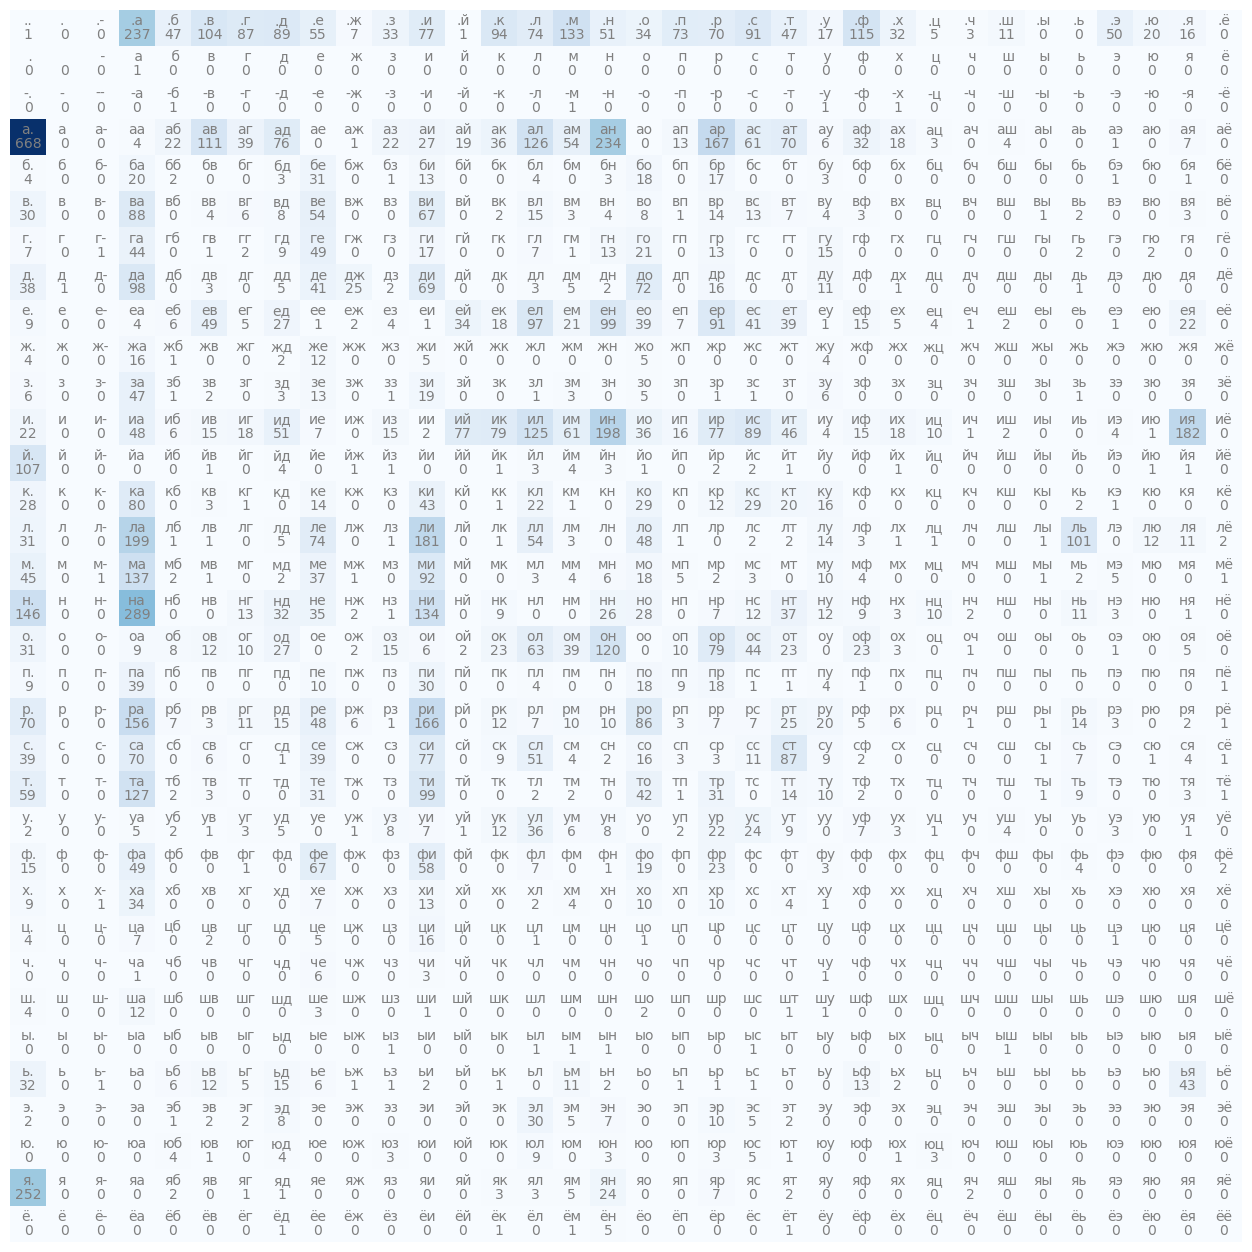

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(num_letters):
    for j in range(num_letters):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [13]:
N[0]

tensor([  1,   0,   0, 237,  47, 104,  87,  89,  55,   7,  33,  77,   1,  94,
         74, 133,  51,  34,  73,  70,  91,  47,  17, 115,  32,   5,   3,  11,
          0,   0,  50,  20,  16,   0], dtype=torch.int32)

In [14]:
p = N[0].float()
p = p / p.sum()
p
P = N

In [328]:
seed = 6543871
g = torch.Generator().manual_seed(seed)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'ё'

In [329]:
g = torch.Generator().manual_seed(seed)
p = torch.rand(3, generator=g)
p

tensor([0.3567, 0.7484, 0.1242])

In [330]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 1])

In [331]:
p.shape

torch.Size([3])

In [332]:
P.shape

torch.Size([34, 34])

In [333]:
P.sum(1, keepdim=True).shape

torch.Size([34, 1])

In [334]:
# 27, 27
# 27,  1

In [335]:
P.sum(1).shape

torch.Size([34])

In [336]:
# 27, 27
#  1, 27

In [337]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [409]:
seed = 1246453
g = torch.Generator().manual_seed(seed)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

фазалья.
ктоида.
нагосука.
милена.
ила.
